In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
import scipy.stats
import numpy as N
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
from scipy import stats 


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
PATH_RESULT = "/content/drive/MyDrive/nlp/network/result/"
PATH_NEW_RESULT = "/content/drive/MyDrive/nlp/network/new_result/"
PATH_DATA = "/content/drive/MyDrive/nlp/network/data/"

# data from Octoparse

In [ ]:
data1 = pd.read_csv(PATH_DATA+"Search_results_Google_YP.csv")

# data from 26 main actor

In [ ]:
data2 = pd.read_excel(PATH_DATA+"actor.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data's shape

In [ ]:
data1.shape[0], data2.shape[0]

(199, 26)

# data jonction

In [ ]:
"""
nonduplicate = data1['Detail_Page'].drop_duplicates()
links = []
linkout = []

for i in data2['Url']:
  cpt = 0
  for j in nonduplicate:
    if j.startswith(str(i)):
      cpt = 1
      links.append(j)
  if cpt == 0:
    linkout.append(i)"""
      
    

"\nnonduplicate = data1['Detail_Page'].drop_duplicates()\nlinks = []\nlinkout = []\n\nfor i in data2['Url']:\n  cpt = 0\n  for j in nonduplicate:\n    if j.startswith(str(i)):\n      cpt = 1\n      links.append(j)\n  if cpt == 0:\n    linkout.append(i)"

In [ ]:
def get_crawled_link(google_search_link_dataFrame, main_actor_link_dataFrame):
  """
    This function take two data and do the intersection of the sites list in
    the datas, the join is for the  of main_actor_link_dataFrame.

    The function return the joins sites link, and the remain sites of 
    main_actor_link_dataFrame which haven't do any intersection
  """
  # drop duplicate link
  nonduplicate = data1['Detail_Page'].drop_duplicates()
  # interset actor and google links 
  links = []
  linkout = []

  for i in data2['Url']:
    cpt = 0
    for j in nonduplicate:
      if j.startswith(str(i)):
        cpt = 1
        links.append(j)
    if cpt == 0:
      linkout.append(i)

  return links+linkout


In [ ]:
links = get_crawled_link(data1, data2)
len(links)

38

# save links in csv file name's links.csv

In [ ]:

links

['https://www.dmr.gov.za/news-room/post/1928/meeting-of-the-presidential-climate-commission-on-just-energy-transition-virtual-platform',
 'https://www.eskom.co.za/about-eskom/just-energy-transition-jet/',
 'https://www.eskom.co.za/world-bank-approves-r9-billion-concessional-loan-facility-for-komati-power-station-repurposing-and-just-energy-transition/',
 'https://www.eskom.co.za/exxaro-and-seriti-resources-join-forces-with-eskom-in-realising-a-just-energy-transition-to-a-low-carbon-future-in-south-africa/',
 'https://green-cape.co.za/sector/energy/utility-scale-renewable-energy/',
 'https://sawea.org.za/initial-just-energy-transition-work-points-to-need-to-cushion-coal-regions/',
 'https://sawea.org.za/wind-industry-stands-together-in-support-of-the-just-energy-transition-training-facility-in-mpumalanga/',
 'https://sawea.org.za/sawea-announces-chair-to-lead-wind-energy-transition/',
 'https://sawea.org.za/biztrends2021-just-energy-transition-will-continue-to-accelerate/',
 'https://sa

# crawl data

In [ ]:
data3 = pd.read_json(PATH_DATA+"crawl.json")

In [ ]:
data3.shape

(209, 4)

In [ ]:
data3.drop_duplicates()

,source,target,site,hyperlink
0,,,,
2,green-cape.co.za,www.youtube.com,https://www.youtube.com/watch?v=vCxWqA1rZOA,South African Renewable Energy Masterplan
3,green-cape.co.za,www.google.com,https://www.google.com/maps/place/GreenCape/@-...,View Map
4,www.eskom.co.za,www.rotekindustries.co.za,https://www.rotekindustries.co.za/Pages/Landin...,Rotek Industries
5,sawea.org.za,www.engineeringnews.co.za,https://www.engineeringnews.co.za/article/init...,https://www.engineeringnews.co.za
...,...,...,...,...
203,www.edpr.com,brasil.edp.com,https://brasil.edp.com/en,EDP Institucional
204,www.edpr.com,portugal.edp.com,https://portugal.edp.com/,portugal.edp.com
205,www.edpr.com,espana.edp.com,https://espana.edp.com/en,espana.edp.com
206,www.edpr.com,brasil.edp.com,https://brasil.edp.com,brasil.edp.com


In [ ]:
data3.dropna()

,source,target,site,hyperlink
0,,,,
1,,,,
2,green-cape.co.za,www.youtube.com,https://www.youtube.com/watch?v=vCxWqA1rZOA,South African Renewable Energy Masterplan
3,green-cape.co.za,www.google.com,https://www.google.com/maps/place/GreenCape/@-...,View Map
4,www.eskom.co.za,www.rotekindustries.co.za,https://www.rotekindustries.co.za/Pages/Landin...,Rotek Industries
...,...,...,...,...
204,www.edpr.com,portugal.edp.com,https://portugal.edp.com/,portugal.edp.com
205,www.edpr.com,espana.edp.com,https://espana.edp.com/en,espana.edp.com
206,www.edpr.com,brasil.edp.com,https://brasil.edp.com,brasil.edp.com
207,,,,


In [ ]:
data5 = pd.read_json(PATH_DATA+'crawl1.json').dropna().drop_duplicates()
data5

,source,target,site,hyperlink
1,www.eskom.co.za,www.rotekindustries.co.za,https://www.rotekindustries.co.za/Pages/Landin...,Rotek Industries
4,green-cape.co.za,www.youtube.com,https://www.youtube.com/watch?v=vCxWqA1rZOA,South African Renewable Energy Masterplan
5,green-cape.co.za,www.google.com,https://www.google.com/maps/place/GreenCape/@-...,View Map
11,www.dmr.gov.za,www.facebook.com,https://www.facebook.com/Department-of-Mineral...,Facebook
12,www.dmr.gov.za,twitter.com,https://twitter.com/DMR_SA,Twitter
...,...,...,...,...
203,www.h1holdings.co.za,scatecsolar.com,https://scatecsolar.com/2018/04/10/scatec-sola...,Dyasons Klip 1 Solar 75MW
204,www.h1holdings.co.za,scatecsolar.com,https://scatecsolar.com/2018/04/10/scatec-sola...,Dyasons Klip 2 Solar 75MW
205,www.h1holdings.co.za,sproutperformance.com,https://sproutperformance.com/,Sprout Performance Partners
206,www.h1holdings.co.za,www.google.co.za,https://www.google.co.za/maps/place/H1+Holding...,Google Map


# build network

In [ ]:
import networkx as nx

In [ ]:
actor_network = nx.from_pandas_edgelist(data5, source="source", target="target",create_using=nx.DiGraph())

In [ ]:
type(actor_network)

networkx.classes.digraph.DiGraph

In [ ]:
actor_network.nodes()

NodeView(('www.eskom.co.za', 'www.rotekindustries.co.za', 'green-cape.co.za', 'www.youtube.com', 'www.google.com', 'www.dmr.gov.za', 'www.facebook.com', 'twitter.com', 'www.gov.za', 'www.brics2017.org', 'sawea.org.za', 'www.engineeringnews.co.za', 'www.bizcommunity.com', 'www.ipp-renewables.co.za', 'linkedin.com', 'www.csir.co.za', 'forms.office.com', 'www.nedbank.co.za', 'www.res4africa.org', 'www.enelgreenpower.com', 'www.enel.com', 'jobs.enel.com', 'www.enelx.com', 'www.enelxway.it', 'globaltrading.enel.com', 'openinnovability.enel.com', 'globalprocurement.enel.com', 'www.enelfoundation.org', 'www.enelcuore.it', 'secure.ethicspoint.eu', 'it-it.facebook.com', 'it.linkedin.com', 'www.instagram.com', 'www.sasol.com', 'www.sasolinsport.co.za', 'www.sasolsignatures.co.za', 'www.solarchallenge.org.za', 'www.sasolrewards.co.za', 'www.sasolbursaries.com', 'www.sasolkhanyisa.com', 'myim.service-now.com', 'www.nersa.org.za', 'www.piidigital.co.za', 'www.engie.com', 'www.engie-homeservices.fr'

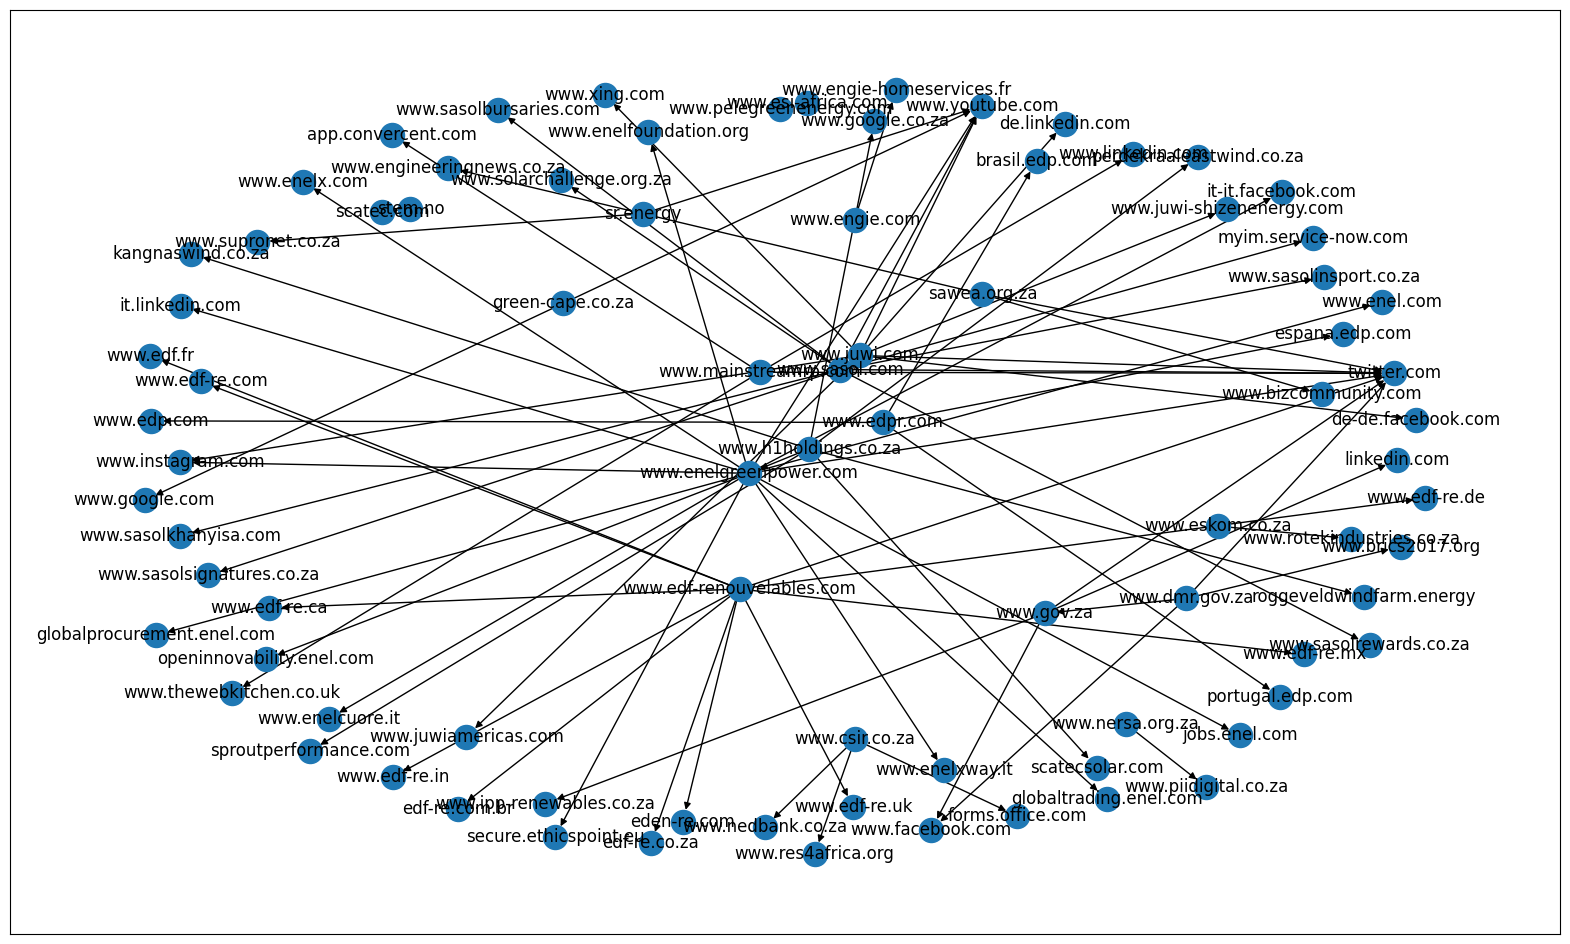

In [ ]:
plt.figure(figsize=(20,12))
nx.draw_networkx(actor_network,with_labels=True,)
plt.show()
#plt.savefig(PATH_NEW_RESULT+"actor_network.png")

#  remove social media

In [ ]:
remove_target = ["twitter","facebook","youtube","google","instagram","linkedin"]

In [ ]:
for i in data5.index:
    if data5["target"][i].split('.')[1] in remove_target or data5["target"][i].split('.')[0] in remove_target:
        data5 = data5.drop(index=i)
        

In [ ]:
print(data5['target'][::2])

1      www.rotekindustries.co.za
14             www.brics2017.org
17          www.bizcommunity.com
30              forms.office.com
47            www.res4africa.org
49            www.res4africa.org
76                 jobs.enel.com
78                  www.enel.com
80               www.enelxway.it
82     openinnovability.enel.com
84        www.enelfoundation.org
86         secure.ethicspoint.eu
98     www.sasolsignatures.co.za
100       www.sasolrewards.co.za
102        www.sasolkhanyisa.com
104         myim.service-now.com
108         www.piidigital.co.za
111                      stem.no
114                edf-re.com.br
116                www.edf-re.de
118                  eden-re.com
120                 edf-re.co.za
122                www.edf-re.uk
155      www.thewebkitchen.co.uk
163             portugal.edp.com
165               brasil.edp.com
167               espana.edp.com
170                  www.edp.com
172         www.juwiamericas.com
196           www.supronet.co.za
198       

In [ ]:
save = data5

# remove other coutry extenxion

In [ ]:
exte = ["za","org","gov","net","com","edu"]

In [ ]:
for i in data5.index:
  c=0
  for j in exte:
    if data5["target"][i].endswith(j):
      c+=1
      break
  if c==0 : 
    data5 = data5.drop(index=i)
      
      

In [ ]:
print(data5.shape)
save.shape

(54, 4)


(69, 4)

In [ ]:
for i in data5.index:
    if data5["target"][i].startswith('www'):
        data5["target"][i] = data5["target"][i][4:]
    if data5["source"][i].startswith('www'):
        data5["source"][i] = data5["source"][i][4:]
    
    

In [ ]:
data5

,source,target,site,hyperlink
1,eskom.co.za,rotekindustries.co.za,https://www.rotekindustries.co.za/Pages/Landin...,Rotek Industries
13,dmr.gov.za,gov.za,https://www.gov.za/issues/national-development...,\n
14,dmr.gov.za,brics2017.org,https://www.brics2017.org/English/,\n
15,sawea.org.za,engineeringnews.co.za,https://www.engineeringnews.co.za/article/init...,https://www.engineeringnews.co.za
17,sawea.org.za,bizcommunity.com,https://www.bizcommunity.com/Article/196/723/2...,bizcommunity.com
21,gov.za,ipp-renewables.co.za,https://www.ipp-renewables.co.za/,Renewable Independent Power Producer Programme
30,csir.co.za,forms.office.com,https://forms.office.com/r/3K63ULTN3P,Alumni
45,csir.co.za,nedbank.co.za,https://www.nedbank.co.za,Nedbank
47,csir.co.za,res4africa.org,https://www.res4africa.org/2020/09/23/a-just-e...,A Just Energy Transition in South Africa
48,csir.co.za,res4africa.org,https://www.res4africa.org/webinar-jet-za/,online event


In [ ]:
sites_network = nx.from_pandas_edgelist(data5, source="source", target="target",create_using=nx.DiGraph())

In [ ]:
#nx.draw_networkx(sites_network,with_labels=True,node_color='r', arrows=True, arrowstyle = '-|>', arrowsize= 20)

# Draw actor network

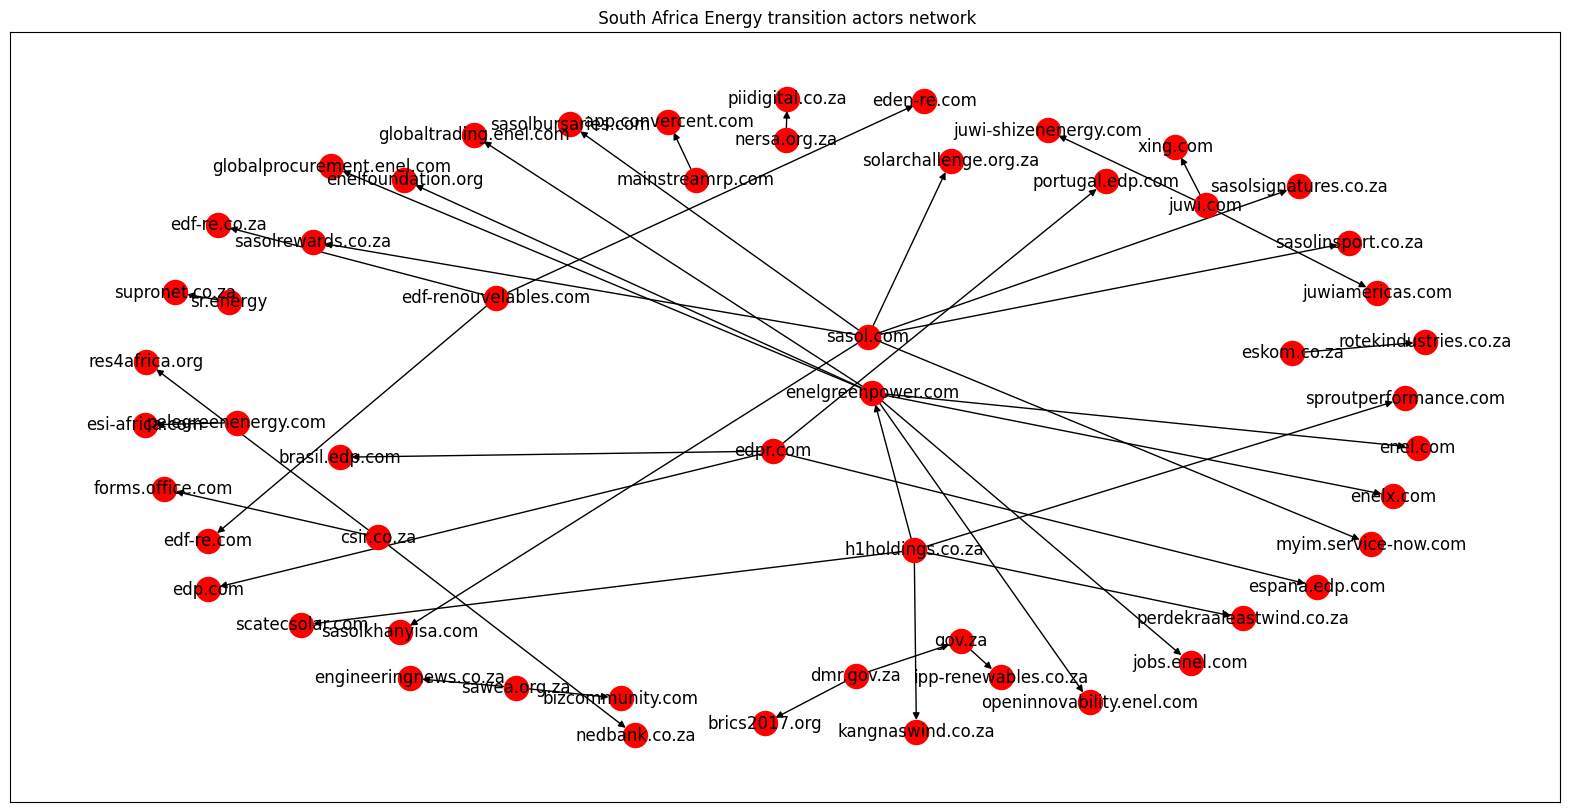

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize=(20,10))
nx.draw_networkx(sites_network,with_labels=True,node_color='r')
plt.title(" South Africa Energy transition actors network")
plt.show()
plt.savefig(PATH_NEW_RESULT+"actornetwork.png")

In [ ]:
data5["site"].to_csv(PATH_DATA+"site.csv")

In [ ]:
nx.write_gml(sites_network,PATH_NEW_RESULT+"network.gml")

# Sub network

In [ ]:
def disconnected_nodes(graph):
  connected_nodes = nx.all_pairs_node_connectivity(graph)
  connected_set = []
  for node in connected_nodes.keys():
    my_dict = {k: v for k, v in connected_nodes[node].items() if v != 0}
    liste = list(my_dict.keys())
    liste.append(node)
    connected_set.append(set(liste))

  list_disconnect = []
  while len(connected_set)>0:
    connected_set_copy = connected_set[:]
    length = len(connected_set_copy)
    sete = connected_set_copy[0] 
    for i in range(1,length):
      if len(sete.intersection(connected_set_copy[i])):
        sete = sete.union(connected_set_copy[i])
        connected_set.remove(connected_set_copy[i])
    #if connected_set_copy[0]==sete:
    connected_set.remove(connected_set_copy[0])
    list_disconnect.append(sete)
  
  return  [list(i) for i in list_disconnect]

In [ ]:
a = disconnected_nodes(sites_network)

In [ ]:
len(a)

13

In [ ]:
a[8]

['mainstreamrp.com', 'app.convercent.com']

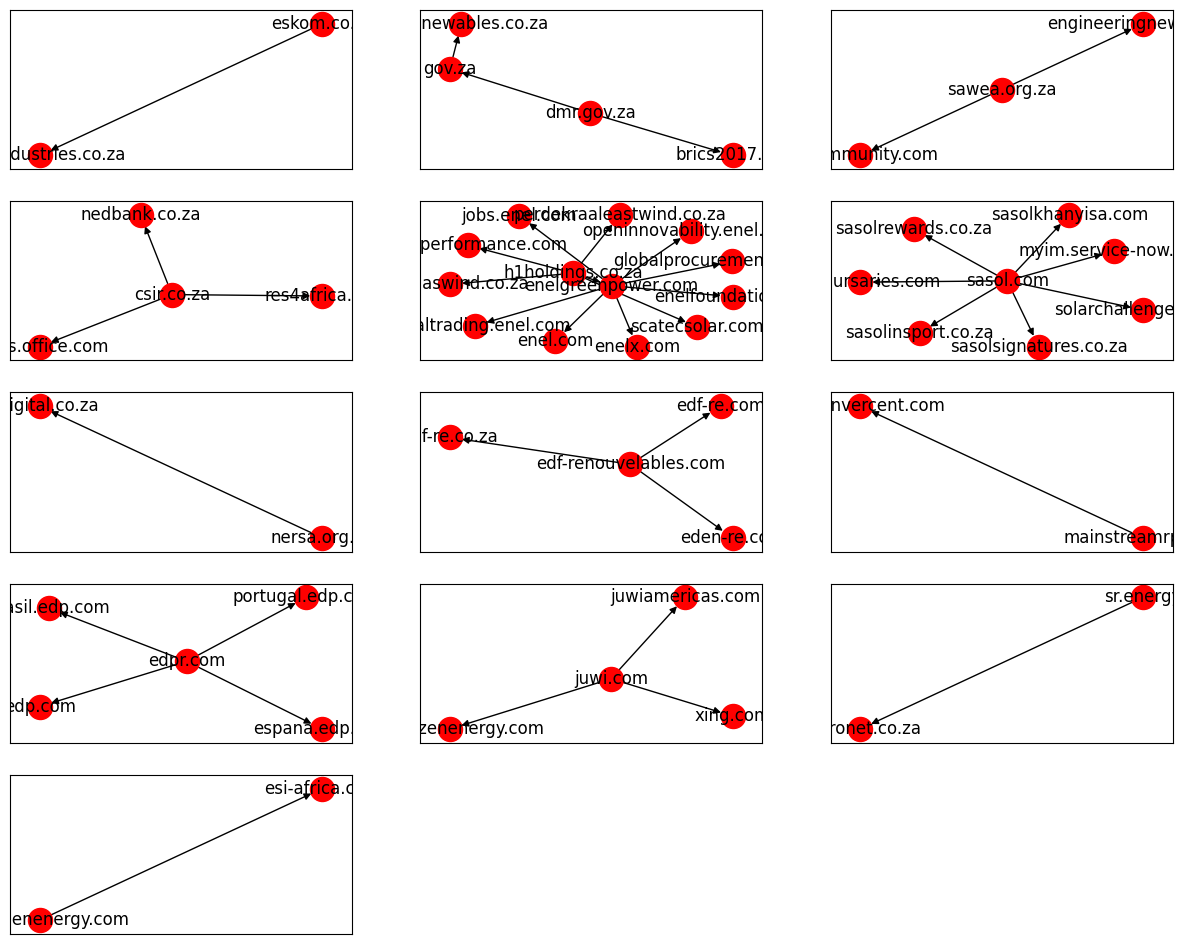

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,12))
j=1
for i in a :
  plt.subplot(5,3,j,label="dd")
  nx.draw_networkx(sites_network.subgraph(i),with_labels=True,node_color='r')
  j+=1
plt.show()
plt.savefig(PATH_NEW_RESULT+"disconnect_subgraphs.png")

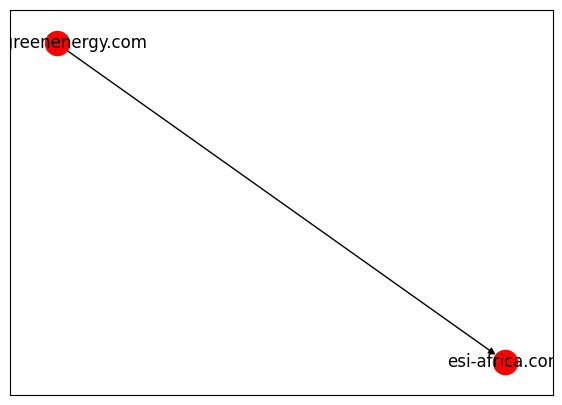

In [ ]:
plt.figure(figsize=(7,5))
j=1
#for i in a[-1] :
  #plt.subplot(1,1,j,label="dd")
nx.draw_networkx(sites_network.subgraph(a[-1]),with_labels=True,node_color='r')
  #j+=1
#plt.show()
plt.savefig(PATH_NEW_RESULT+"disconnect_subgraphs.png")

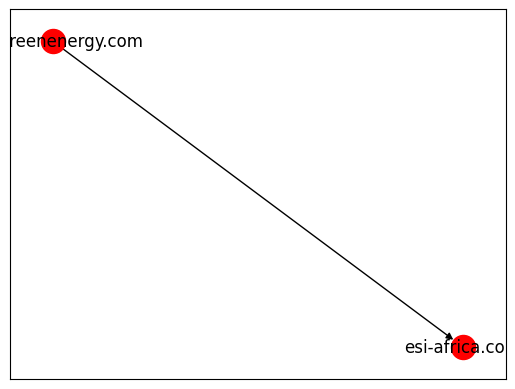

In [ ]:
nx.draw_networkx(sites_network.subgraph(a[12]),with_labels=True,node_color='r')

### Network caracteristique

In [ ]:
print(f"we got {len(sites_network.nodes)} nodes and {len(sites_network.edges)} edges ")

we got 55 nodes and 42 edges 


# retrieve Site for scrap the content

# Numerical Analysis

In [ ]:
out_degree = dict(sites_network.out_degree())
sorted_out_degree = dict(sorted(out_degree.items(), key=lambda item: item[1],reverse=True))
filter_sorted_out_degree = {k:v for k,v in sorted_out_degree.items()  if v>0}

In [ ]:
in_degree = dict(sites_network.in_degree())
sorted_in_degree = dict(sorted(in_degree.items(), key=lambda item: item[1],reverse=True))
filter_sorted_in_degree = {k:v for k,v in sorted_in_degree.items()  if v>0}


In [ ]:
in_degree = dict(sites_network.in_degree())
out_degree = dict(sites_network.out_degree())
actor = list(in_degree.keys())
actor_in_degree = list(in_degree.values())
actor_out_degree = list(out_degree.values())

In [ ]:
N = 55
centrality_actor_in_degree = [i/(N-1) for i in actor_in_degree]
centrality_actor_out_degree = [i/(N-1) for i in actor_out_degree]

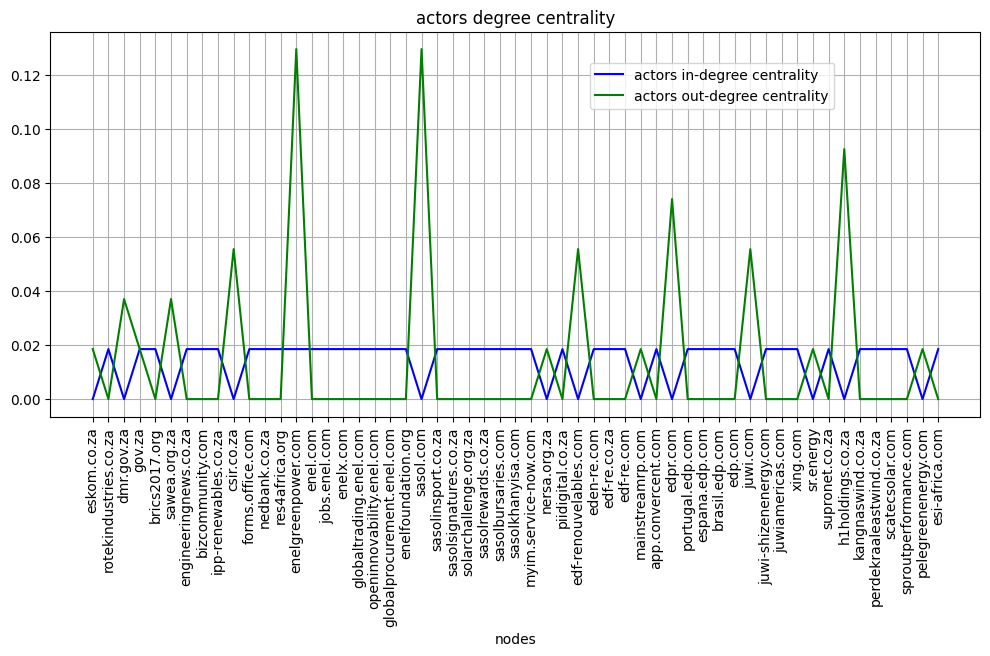

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(actor, centrality_actor_in_degree ,color='b',label = "actors in-degree centrality")
plt.plot(actor, centrality_actor_out_degree ,color='g',label = "actors out-degree centrality")
plt.xlabel("nodes")
plt.title("actors degree centrality")
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.legend(loc=(0.58,0.8))
plt.savefig(PATH_NEW_RESULT+"in_out.png",dpi=400)

In [ ]:
degrees = dict(sites_network.degree())
values = sorted(set(degrees.values()))
Pk = [list(degrees.values()).count(x)/len(degrees) for x in values]
plt.figure(figsize=(12,5))
plt.plot(values, Pk,color='g')
plt.xlabel('k ')
plt.ylabel('P(k)')
plt.title('Degree Distribution')
plt.grid()
plt.show()

#Degree distribution

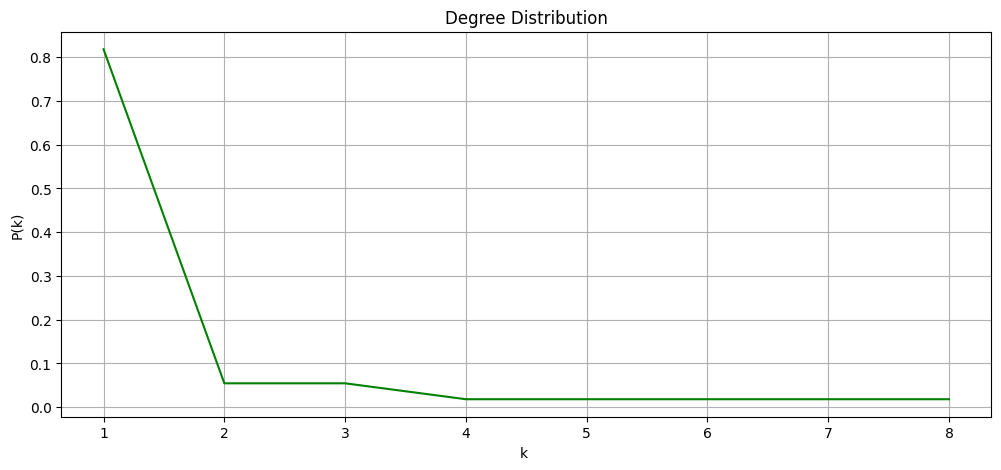

In [ ]:
degrees = dict(sites_network.degree())
values = sorted(set(degrees.values()))
Pk = [list(degrees.values()).count(x)/len(degrees) for x in values]
plt.figure(figsize=(12,5))
plt.plot(values, Pk,color='g')
plt.xlabel('k ')
plt.ylabel('P(k)')
plt.title('Degree Distribution')
plt.grid()
plt.show()

## Analytic

In [ ]:
nx.average_clustering(sites_network)

In [ ]:
nx.average_degree_connectivity(sites_network)

#centrality metrics

In [ ]:
l=nx.degree_centrality(sites_network)
a=dict(sorted(l.items(), key=lambda item: item[1],reverse=True))

In [ ]:
l=nx.betweenness_centrality(sites_network)
a=dict(sorted(l.items(), key=lambda item: item[1],reverse=True))

In [ ]:
l=nx.closeness_centrality(sites_network)
a=dict(sorted(l.items(), key=lambda item: item[1],reverse=True))


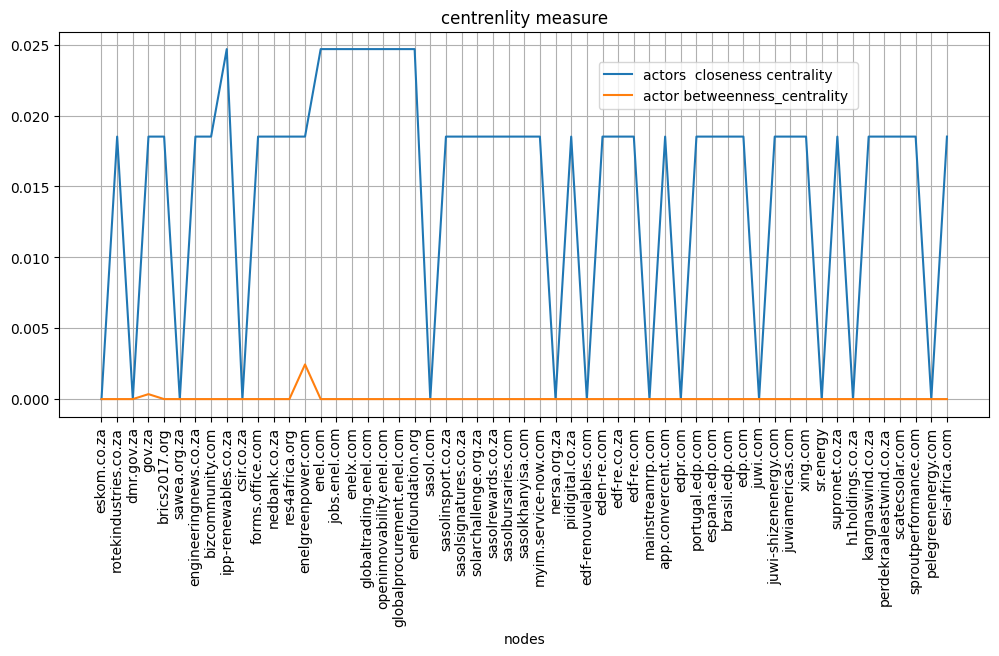

In [ ]:
nodes = list(nx.degree_centrality(sites_network).keys())
degree= list(nx.degree_centrality(sites_network).values())
closeness = list(nx.closeness_centrality(sites_network).values())
betwenness = list(nx.betweenness_centrality(sites_network).values())

plt.figure(figsize=(12,5))
#plt.plot(nodes,degree, label="actors degree centrality")
plt.plot(nodes,closeness, label="actors  closeness centrality")
plt.plot(nodes,betwenness, label="actor betweenness_centrality ")
plt.xlabel("nodes")
plt.title("centrenlity measure")
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.legend(loc=(0.58,0.8))
plt.savefig(PATH_NEW_RESULT+"centrenlity_metrics.png",dpi=400)

# Subplots

In [ ]:

pos = [(0,0), (1,0), (2,0)]
ord = [degree, closeness, betwenness]
titres = ["actors degree centrality", "actors  closeness centrality", "actor betweenness_centrality"]
fig, ax = plt.subplots(3, 1, figsize=(12,12))

for cood, y, titre in zip(pos,ord,titres):
  fig.subplots_adjust(wspace=2)
  ax[cood[0]].plot(nodes, y,  marker = 'o', color = 'blue',label='centrality metrics',linewidth=2, pickradius=3)
  ax[cood[0]].set_xlabel('Nodes')
  ax[cood[0]].set_ylabel('Values')

  ax[cood[0]].set_title(f'{titre}',c='r',fontsize=8)

  ax[cood[0]].set_xlim(nodes[0],nodes[-1])
  ax[cood[0]].xaxis.grid(True)
  ax[cood[0]].yaxis.grid(True)
  ax[cood[0]].xaxis.set_ticks(nodes)
  ax[cood[0]].tick_params(axis='x', rotation=90)

        
  ax[cood[0]].plot(nodes, y, color='orange', label=' ', )  
  ax[cood[0]].legend(loc='lower left')
  ax[cood[0]].legend(fancybox=True, framealpha=1, shadow=True ,borderpad=1, ncol=1)
  

plt.show()

fig.subplots_adjust(wspace=2)
filout="tendance.png"
fig.savefig(PATH_NEW_RESULT+filout,dpi=300) 



# Coefficient metrics

In [ ]:
# clustering is 0
a =nx.clustering((sites_network))
a

In [ ]:
try:
  print(nx.average_shortest_path_length(sites_network))
  print(nx.eigenvector_centrality(sites_network))
  print(nx.diameter(sites_network))
  print(nx.radius(sites_network))
  print(nx.eccentricity(sites_network))
except:
  print('Graph is not strongly connected. Metric not possible')


Graph is not strongly connected. Metric not possible


In [ ]:
nx.density(sites_network)

0.014141414141414142

In [ ]:
nx.average_node_connectivity(sites_network)

0.016835016835016835

# Page rank

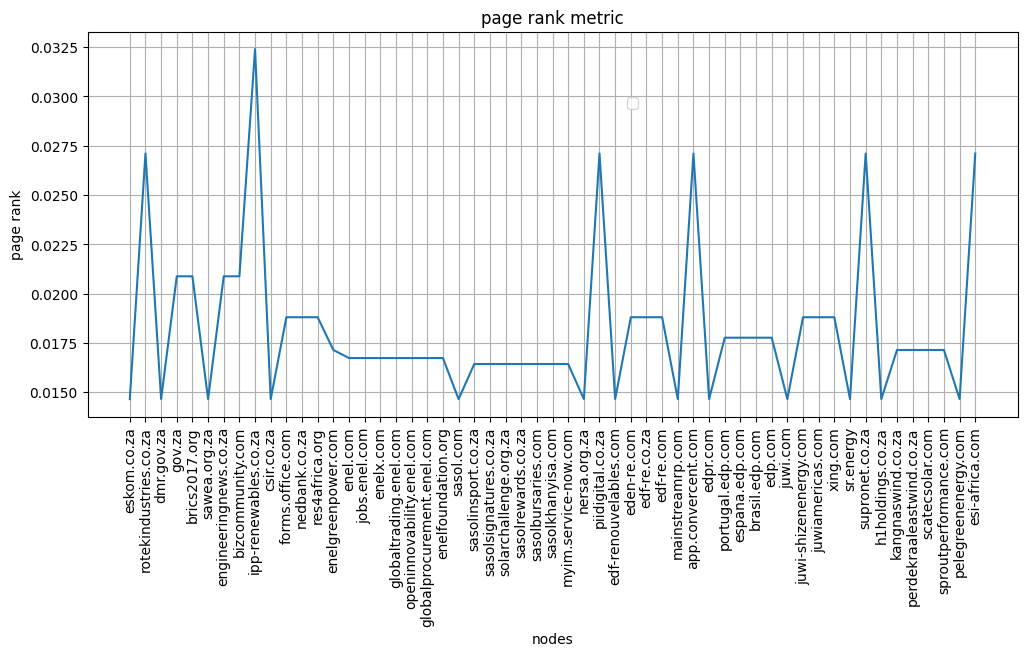

In [ ]:
nodes = list(nx.pagerank(sites_network).keys())
page= list(nx.pagerank(sites_network).values())
plt.figure(figsize=(12,5))
plt.plot(nodes,page)
plt.title('page rank metric')
plt.xlabel("nodes")
plt.ylabel("page rank")
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.legend(loc=(0.58,0.8))
plt.savefig(PATH_NEW_RESULT+"page_rank.png",dpi=400)

# Save actors url for scrap data text on their sites

In [ ]:
data5.site

In [ ]:
#data6 = data5["site"]

In [ ]:
all_links = links+list(data5["site"])
#data6["links"] = all_links

In [ ]:
data6 = pd.DataFrame.from_dict({"links":all_links})

In [ ]:
data6.shape

In [ ]:
data7 = data6.dropna().drop_duplicates()

In [ ]:
data7.shape

In [ ]:
data7.to_csv(PATH_NEW_RESULT+"All_links.csv")